In [1]:
import torch
import torch.utils.data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
import pandas as pd
from torchvision.utils import save_image
import random


c:\Users\deniz\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("mnist_train.csv", header = None)
testData = pd.read_csv("mnist_train.csv", header = None)

In [3]:
allData = np.array(data)
allTestData = np.array(testData)

In [4]:
y = allData[:,0]
X = np.delete(allData, 0, 1) / 255

y_test = allTestData[:,0]
X_test = np.delete(allTestData, 0, 1) / 255

In [5]:
save_image(torch.tensor([X[0]]).view(-1, 1, 28, 28), "results/5.png")

C:\Users\deniz\AppData\Local\Temp\ipykernel_10384\3314637757.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  save_image(torch.tensor([X[0]]).view(-1, 1, 28, 28), "results/5.png")


In [6]:
X_subset = X[0:10000]

In [ ]:
n_components = np.arange(10, 150, 10)
aicsGMM = []
for n in n_components:
    GMM = GaussianMixture(n, covariance_type='full', random_state=0, verbose = 2)
    aicsGMM.append(GMM.fit(X_subset).aic(X_subset))

aicsGMM = np.array(aicsGMM)

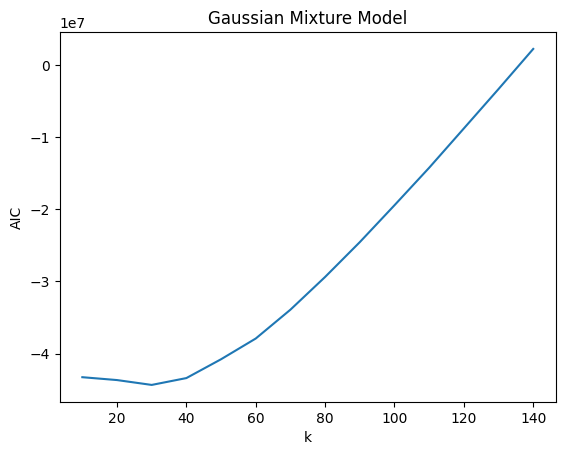

In [10]:
plt.title("Gaussian Mixture Model") 
plt.xlabel("k")   
plt.ylabel("AIC")
plt.plot(n_components, aicsGMM)

In [11]:
optimized_param = n_components[aicsGMM.argmin()]
print(optimized_param)

30


In [12]:
optGMM = GaussianMixture(optimized_param, covariance_type='full', random_state=0, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 582.75569s	 ll change 3.68446
  Iteration 20	 time lapse 544.68742s	 ll change 0.06165
  Iteration 30	 time lapse 540.35280s	 ll change 0.00421
Initialization converged: True	 time lapse 1937.45928s	 ll 2786.42207


In [13]:
z = np.array([random.randint(0, 29) for _ in range(64)])
mean = optGMM.means_[z]
cov = optGMM.covariances_[z]

pictures = np.array([np.random.multivariate_normal(mean[i], cov[i]) for i in range(64)])
tensorPics = torch.tensor(pictures).view(64, 1, 28, 28)
save_image(tensorPics, "results/GMM-64.png")
# tensorPicture = torch.tensor([torch.tensor(pic).view(1, 1, 28, 28) for pic in pictures])

In [14]:
print(optGMM.score(X_test))

2786.4220658422655


# Factor Analysis

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


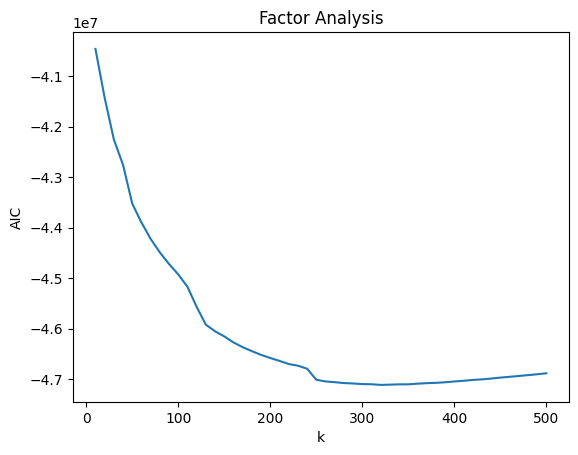

In [7]:
k_components = np.arange(10, 510, 10)
aicsFA = []
for k in k_components:
    print(k)
    model = FactorAnalysis(n_components=k, random_state=0).fit(X_subset)
    score = model.score(X_subset) * len(X_subset)
    p = len(X_subset[0])
    correction = (p * (k + 1) - k * (k - 1) / 2) * np.log(len(X_subset))
    aic = -2 * score + correction
    aicsFA.append(aic)

aicsFA = np.array([aicsFA])
plt.title("Factor Analysis") 
plt.xlabel("k")   
plt.ylabel("AIC")   
plt.plot(k_components, aicsFA)

In [17]:
optimized_param2 = k_components[aicsFA.argmin()]
print(optimized_param2)

320


In [18]:
optFA = FactorAnalysis(n_components=optimized_param2, random_state=0).fit(X)

In [19]:
print(optFA.score(X_test))

2037.4374354443937


In [21]:
pictureFA2 = np.random.multivariate_normal(optFA.mean_, optFA.get_covariance(), 64)
tensorPicsFA = torch.tensor(pictureFA2).view(64, 1, 28, 28)
save_image(tensorPicsFA, "results/FA-64.png")

### Lower dim for test

In [281]:
comps = [2, 5, 10, 20, 30, 60, 100, 200 ,300 ,400 , 500 ,600 , 700, 785]
for comp in comps:
    fa_iter = FactorAnalysis(n_components=comp).fit(X)
    pictures_iter = np.random.multivariate_normal(fa_iter.mean_, fa_iter.get_covariance(), 64)
    tensorPic_iter = torch.tensor(pictures_iter).view(64, 1, 28, 28)
    save_image(tensorPic_iter, f"results/64FA{comp}.png")